In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r'c:\Users\Dell\Downloads\RJsKXWqDBZc3m0GG.csv')
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [3]:
df.shape

(15992, 9)

In [4]:
df.Hisp.value_counts().reset_index()

,Hisp,count
0,NotHispanic,14840
1,hispanic,1152


In [5]:
df.Race.value_counts().reset_index()

,Race,count
0,NotBlack,14816
1,black,1176


In [6]:
df.Eduacation.value_counts().reset_index()

,Eduacation,count
0,HighSchool,6252
1,LessThanHighSchool,4731
2,Intermediate,2708
3,graduate,1367
4,PostGraduate,934


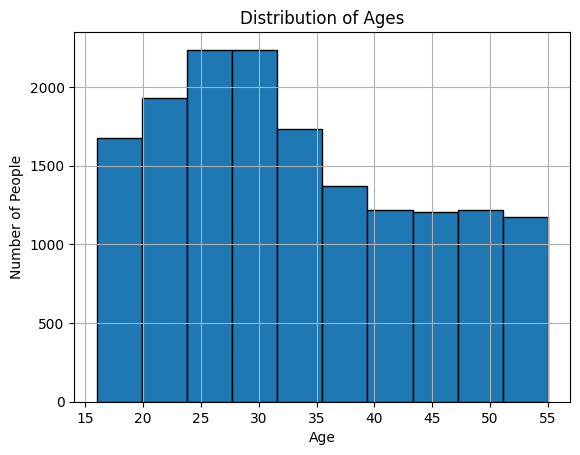

In [7]:
plt.hist(df.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Distribution of Ages')
plt.grid(True)

# Display plot
plt.show()

In [8]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

In [9]:
corr_matrix = df[['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978']]

corr_matrix.head()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,1,21516.670,25243.550,25564.670
1,21,0,3175.971,5852.565,13496.080
2,38,0,23039.020,25130.760,25564.670
3,48,1,24994.370,25243.550,25564.670
4,18,1,1669.295,10727.610,9860.869


<Axes: >

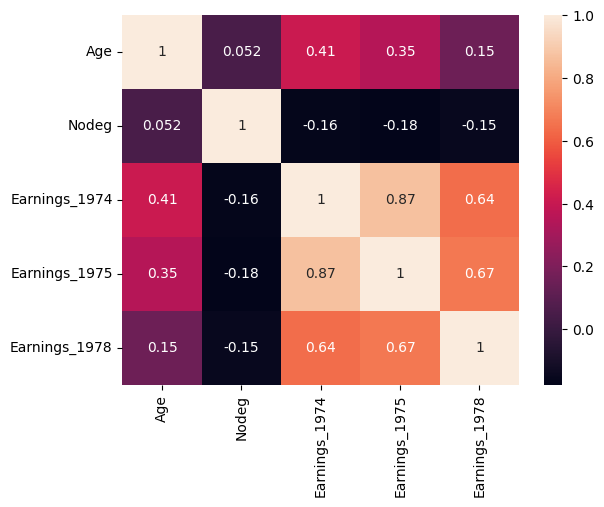

In [10]:
sns.heatmap(corr_matrix.corr(), annot=True)

In [11]:
MaritalStatus = {
    'Married': 1,
    'NotMarried': 0
}

df.MaritalStatus = df.MaritalStatus.map(MaritalStatus)

In [12]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,1,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,0,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,1,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,1,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,1,1,1669.295,10727.610,9860.869


C:\Users\Dell\AppData\Local\Temp\ipykernel_10292\1086580965.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


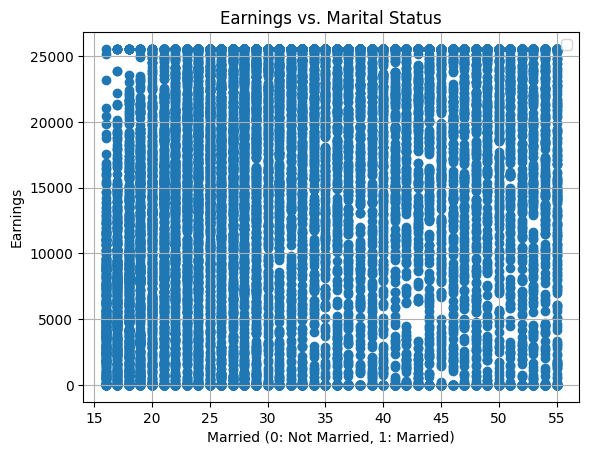

In [13]:
# based on the graph the married col is not useful

plt.scatter(df.Age, df.Earnings_1978, )
plt.xlabel('Married (0: Not Married, 1: Married)')
plt.ylabel('Earnings')
plt.title('Earnings vs. Marital Status')
plt.legend()
plt.grid(True)

# Display plot
plt.show()

In [14]:
Hisp = {
    'Hispanic': 1,
    'NotHispanic': 0
}

df.Hisp = df.Hisp.map(Hisp)

In [15]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,0.0,1,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,0.0,0,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,0.0,1,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,0.0,1,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,0.0,1,1,1669.295,10727.610,9860.869


In [16]:
df = pd.get_dummies(df, columns=['Eduacation'])

In [17]:
# Initialize the encoder
label_encoder = LabelEncoder()


for col in ['Eduacation_HighSchool', 'Eduacation_Intermediate', 'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate', 'Eduacation_graduate']:
    df[col] = label_encoder.fit_transform(df[col])

# training the data only on education column

In [18]:
df.head()

,Age,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate
0,45,NotBlack,0.0,1,1,21516.670,25243.550,25564.670,0,0,1,0,0
1,21,NotBlack,0.0,0,0,3175.971,5852.565,13496.080,0,1,0,0,0
2,38,NotBlack,0.0,1,0,23039.020,25130.760,25564.670,1,0,0,0,0
3,48,NotBlack,0.0,1,1,24994.370,25243.550,25564.670,0,0,1,0,0
4,18,NotBlack,0.0,1,1,1669.295,10727.610,9860.869,0,0,1,0,0


In [ ]:
df.drop(columns=['Race', 'Hisp', 'Nodeg', 'MaritalStatus'], inplace=True)

df.head()

,Age,MaritalStatus,Earnings_1974,Earnings_1975,Earnings_1978,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate
0,45,1,21516.670,25243.550,25564.670,0,0,1,0,0
1,21,0,3175.971,5852.565,13496.080,0,1,0,0,0
2,38,1,23039.020,25130.760,25564.670,1,0,0,0,0
3,48,1,24994.370,25243.550,25564.670,0,0,1,0,0
4,18,1,1669.295,10727.610,9860.869,0,0,1,0,0


In [24]:
x = df.drop(columns=['Earnings_1978'])
y = df.Earnings_1978

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 48659344.27465779
R-squared: 0.47635223896831025


In [ ]:
math.sqrt(48659344.27465779)

6975.6250096072245

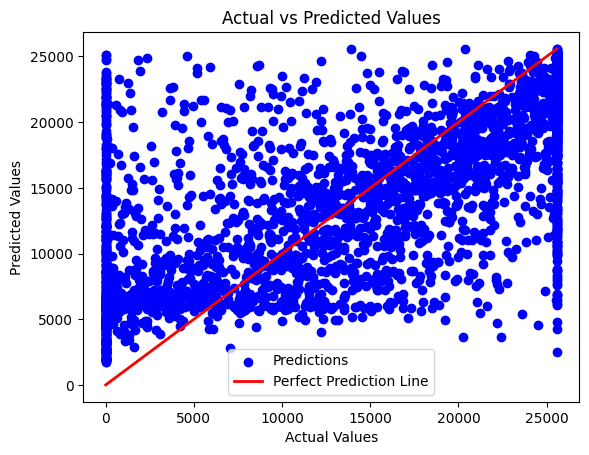

In [36]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')

# Plot a line for perfect predictions (where actual = predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


# On taking all the column and without the feature enginerring

In [40]:
data = pd.read_csv(r'c:\Users\Dell\Downloads\RJsKXWqDBZc3m0GG.csv')
data.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [41]:
# Initialize the encoder
label_encoder = LabelEncoder()


for col in ['Eduacation', 'Race', 'Hisp', 'MaritalStatus']:
    data[col] = label_encoder.fit_transform(data[col])

In [42]:
data.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,2,0,0,0,1,21516.670,25243.550,25564.670
1,21,1,0,0,1,0,3175.971,5852.565,13496.080
2,38,0,0,0,0,0,23039.020,25130.760,25564.670
3,48,2,0,0,0,1,24994.370,25243.550,25564.670
4,18,2,0,0,0,1,1669.295,10727.610,9860.869


In [47]:
x = data.drop(columns=['Earnings_1978'])
y = data.Earnings_1978

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 48625781.822784565
R-squared: 0.47671342145114337


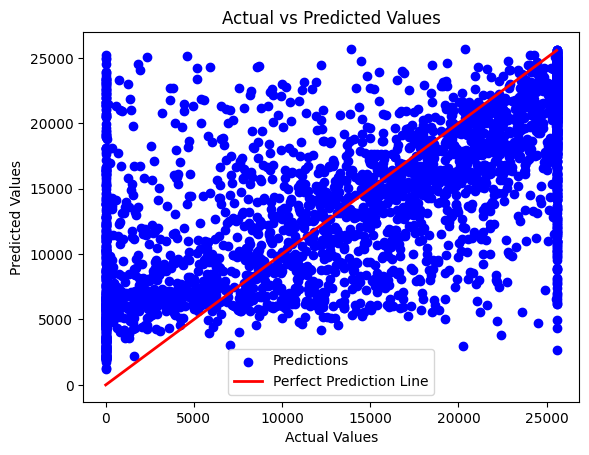

In [52]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')

# Plot a line for perfect predictions (where actual = predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


# Now Taking only the earning column based on the correlation

In [53]:
data = pd.read_csv(r'c:\Users\Dell\Downloads\RJsKXWqDBZc3m0GG.csv')
data.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [54]:
data = data.drop(columns=['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg'])

In [55]:
data.head()

,Earnings_1974,Earnings_1975,Earnings_1978
0,21516.670,25243.550,25564.670
1,3175.971,5852.565,13496.080
2,23039.020,25130.760,25564.670
3,24994.370,25243.550,25564.670
4,1669.295,10727.610,9860.869


In [56]:
x = data.drop(columns=['Earnings_1978'])
y = data.Earnings_1978

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 49853230.65546429
R-squared: 0.46350422509646805


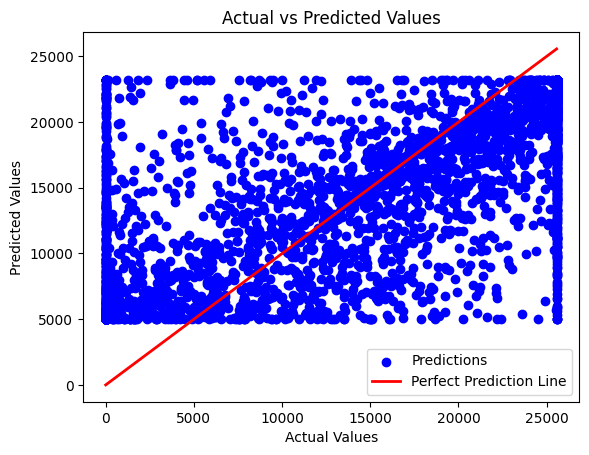

In [60]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')

# Plot a line for perfect predictions (where actual = predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()
